## ROC曲线
> **reveiver operation characteristic curve**

> **描述TPR和FPR的关系**

> **采用roc的面积作为算法的评判标准**

<img src='./picture/7-1.png'>
<img src='./picture/7-2.png'>
<img src='./picture/7-3.png'>

## 实现tpr和fpr

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [3]:
import sys
sys.path.append('E:\github\ml_practice\ml_python')
from model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed = 666)

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train , y_train)
decision_scores = log_reg.decision_function(X_test)

In [5]:
from metrics import TPR,FPR

decision_scores = log_reg.decision_function(X_test)
fprs = []
tprs = []

In [6]:
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    fprs.append(FPR(y_test, y_predict))
    tprs.append(TPR(y_test, y_predict))

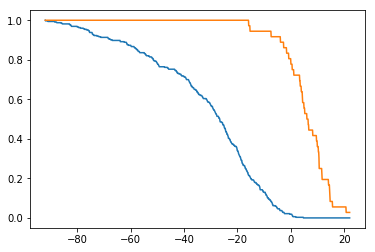

In [8]:
plt.plot(thresholds, fprs)
plt.plot(thresholds, tprs)
plt.show()

---
ROC曲线

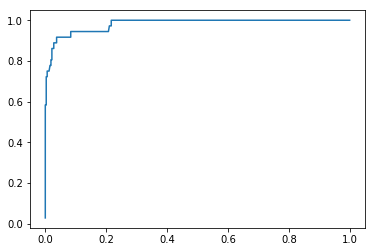

In [9]:
plt.plot(fprs, tprs)
plt.show()

## scikit-learn中的ROC
> **roc_auc_score方法求roc曲线面积**

<img src='./picture/7-4.png'>

In [10]:
from sklearn.metrics import roc_curve

In [11]:
fprs, tprs, thresholds = roc_curve(y_test, decision_scores)

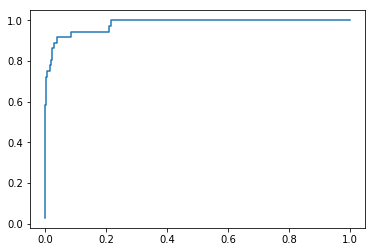

In [12]:
plt.plot(fprs, tprs)
plt.show()

In [13]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, decision_scores)

0.9812521499828001